In [74]:
import numpy as np
from scipy import signal
import cmath
import matplotlib.pyplot as plt

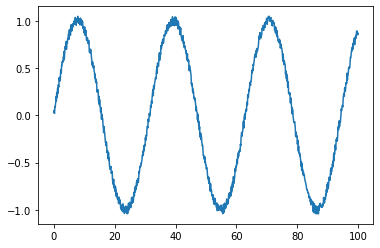

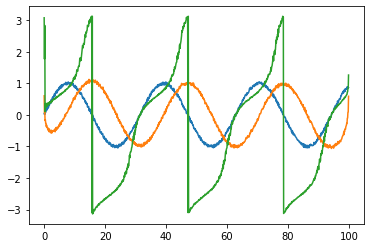

In [82]:
dt = 0.1
dur = 100.

time_ = np.arange(0,dur, dt)
amp = 0.05

signal_0 = np.sin(0.2 * time_)
for t in range(len(signal_0)):
    signal_0[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_0)
plt.show()

signal_0_hilbert = signal.hilbert(signal_0)
phase = np.zeros((signal_0.shape))
for t in range(len(phase)):
    phase[t] = cmath.phase(complex(signal_0[t],signal_0_hilbert[t]))
    
plt.plot(time_, signal_0_hilbert.real)
plt.plot(time_, signal_0_hilbert.imag)
plt.plot(time_, phase)
plt.show()

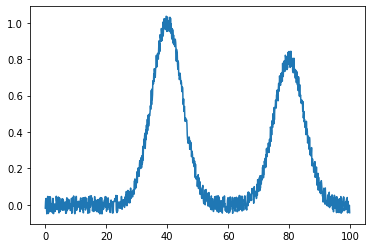

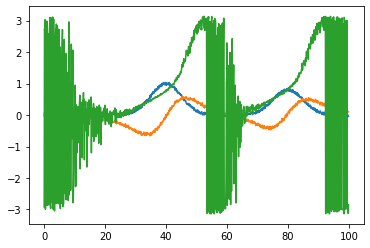

In [83]:
signal_1 = np.exp(- 0.02 * (40.-time_)**2)
signal_1 += 0.8 * np.exp(- 0.02 * (80.-time_)**2)
for t in range(len(signal_1)):
    signal_1[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_1)
plt.show()

signal_1_hilbert = signal.hilbert(signal_1)
phase = np.zeros((signal_1.shape))
for t in range(len(phase)):
    phase[t] = cmath.phase(complex(signal_1[t],signal_1_hilbert[t]))
    
plt.plot(time_, signal_1_hilbert.real)
plt.plot(time_, signal_1_hilbert.imag)
plt.plot(time_, phase)
plt.show()

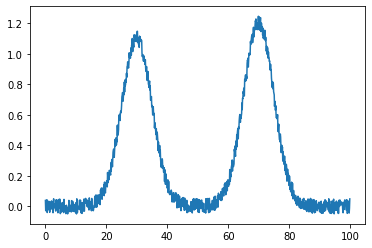

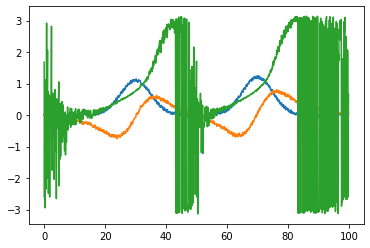

In [84]:
signal_2 = 1.1 * np.exp(- 0.02 * (30.-time_)**2)
signal_2 += 1.2 * np.exp(- 0.02 * (70.-time_)**2)
for t in range(len(signal_2)):
    signal_2[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_2)
plt.show()

signal_2_hilbert = signal.hilbert(signal_2)
phase = np.zeros((signal_2.shape))
for t in range(len(phase)):
    phase[t] = cmath.phase(complex(signal_2[t],signal_2_hilbert[t]))
    
plt.plot(time_, signal_2_hilbert.real)
plt.plot(time_, signal_2_hilbert.imag)
plt.plot(time_, phase)
plt.show()

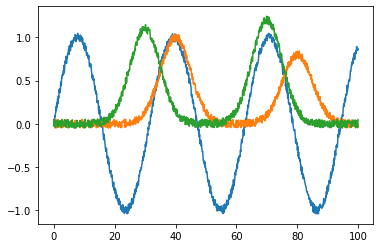

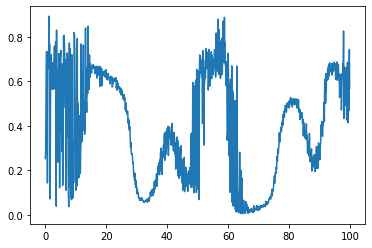

In [85]:
signal_array = np.stack((signal_0, signal_1, signal_2), axis=0)

for n in range(signal_array.shape[0]):
    plt.plot(time_, signal_array[n,:])
plt.show()

phase_array = phaseArray(signal_array)
exp_phase_sum = expPhaseSum(phase_array, signal_array.shape[0])
f_ = f_phase(signal_array)
plt.plot(time_, f_)
plt.show()

In [86]:
def phaseArray(signal_array):
    phase_array = np.zeros((signal_array.shape))
    for n in range(signal_array.shape[0]):
        hilbert_trafo = signal.hilbert(signal_array[n,:])
        for t in range(len(hilbert_trafo)):
            phase_array[n,t] = cmath.phase(complex(signal_array[n,t],hilbert_trafo[t]))
    return phase_array

def expPhaseSum(phase_array, M):
    exp_sum = np.zeros((phase_array.shape[1]))
    for t in range(len(exp_sum)):
        phasesum = complex(0,0)
        for m in range(M):
            phasesum += np.exp(complex(0,phase_array[m,t]))
        exp_sum[t] = np.abs(phasesum) / M
    return exp_sum

def f_phase(signal_array):
    f_ = np.zeros((signal_array.shape[1]))
    phase_array = phaseArray(signal_array)
    exp_sum = expPhaseSum(phase_array, signal_array.shape[0])
    
    for t in range(len(exp_sum)):
        f_[t] =( 1. - exp_sum[t] )
        
    return f_

def f_int(f_,dt):
    cost = 0.
    for t in range(len(f_)):
        cost += dt * f_[t]
    return cost
        
def derSignal(signal_array, ds):
    der_signal = np.zeros((signal_array.shape))
    signal_ds = signal_array.copy()
    f_phase0 = f_phase(signal_array)

    for n in range(der_signal.shape[0]):
        for t in range(der_signal.shape[1]):
            signal_ds[n,t] += ds
            der_signal[n,t] = ( f_phase(signal_ds)[t] - f_phase0[t] ) / ds
            signal_ds[n,t] -= ds
            
    return der_signal

--------------- 0


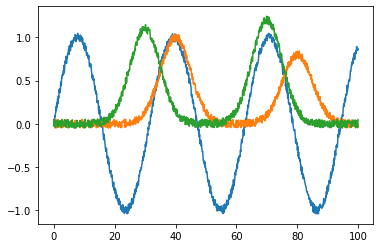

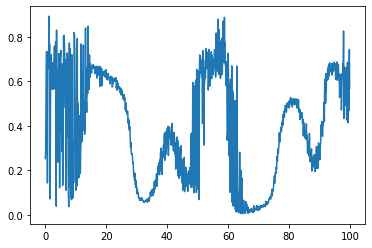

cost =  39.13279006554264
--------------- 1


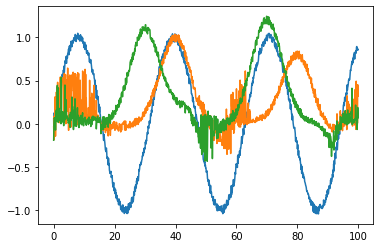

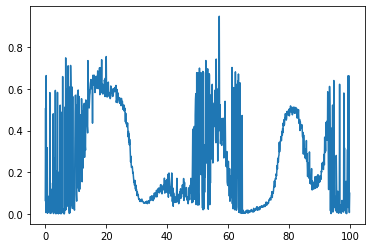

cost =  25.91398820296805
--------------- 2


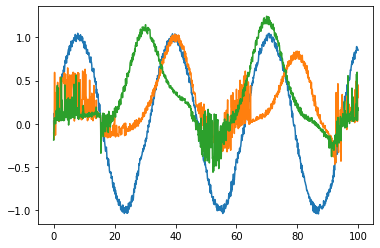

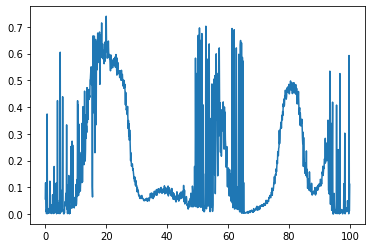

cost =  19.872706052653662
--------------- 3


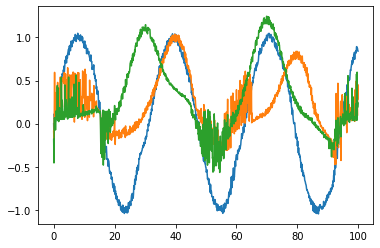

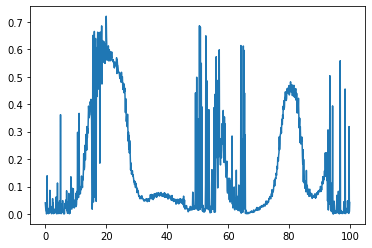

cost =  16.168568375386517
--------------- 4


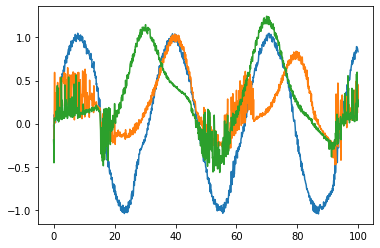

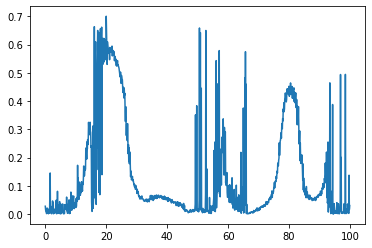

cost =  13.833523813932388
--------------- 5


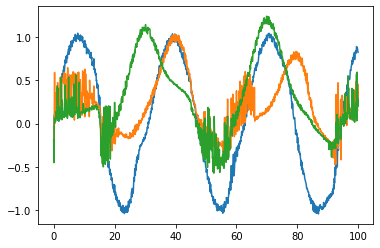

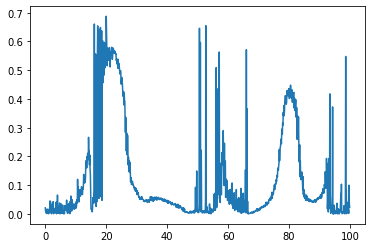

cost =  12.084010687734322
--------------- 6


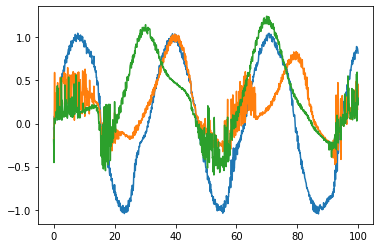

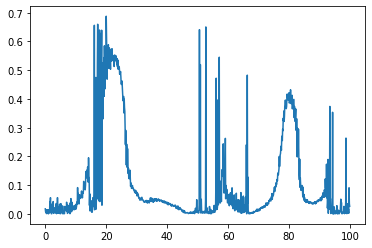

cost =  10.810847032187601
--------------- 7


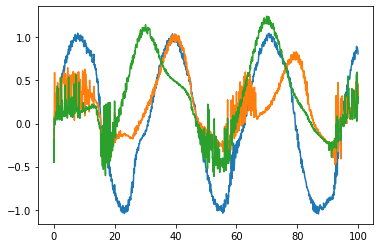

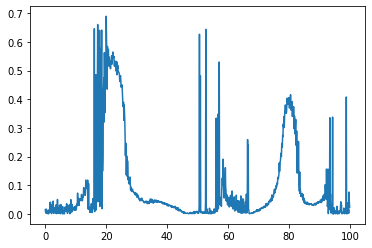

cost =  9.702894523033269
--------------- 8


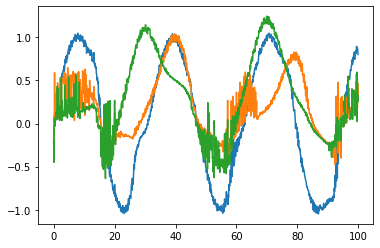

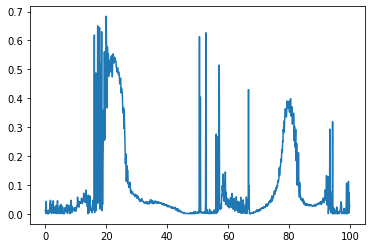

cost =  8.751745289352913
--------------- 9


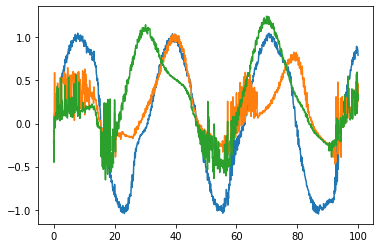

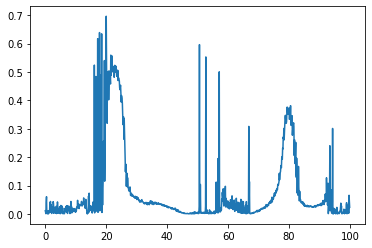

cost =  7.844508176916691
--------------- 10


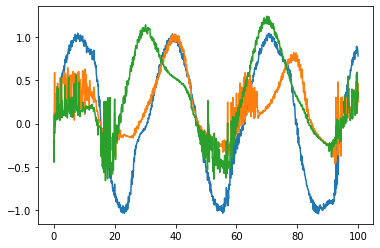

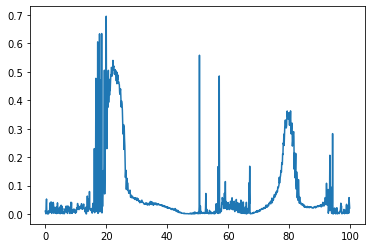

cost =  7.0950878933701835
--------------- 11


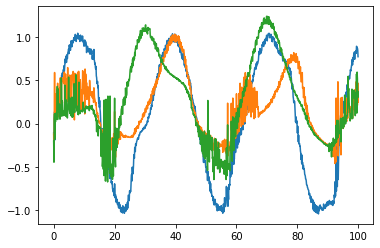

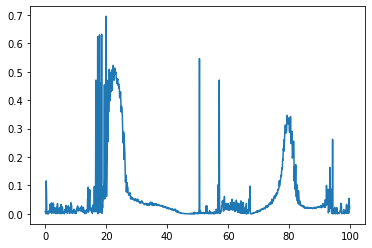

cost =  6.493531619469242
--------------- 12


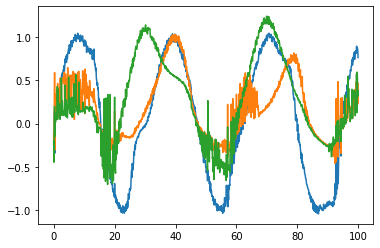

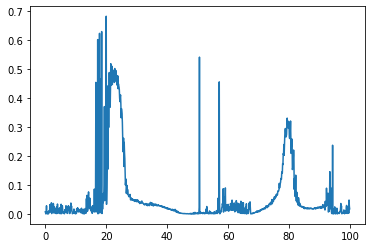

cost =  5.99514623911288
--------------- 13


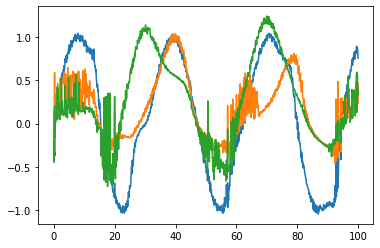

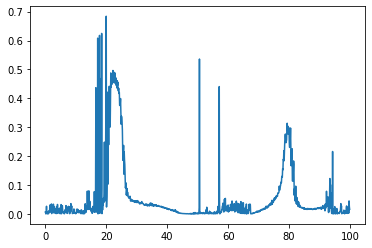

cost =  5.526077028777879
--------------- 14


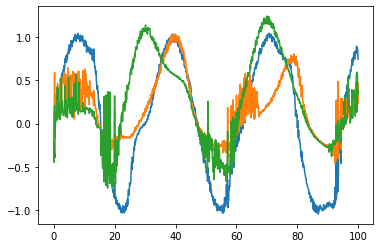

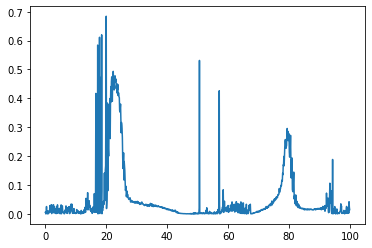

cost =  5.1156181544430614
--------------- 15


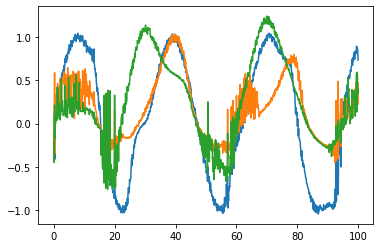

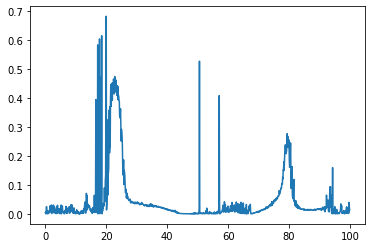

cost =  4.747220148127131
--------------- 16


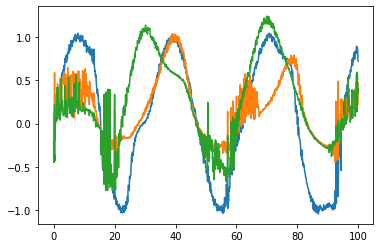

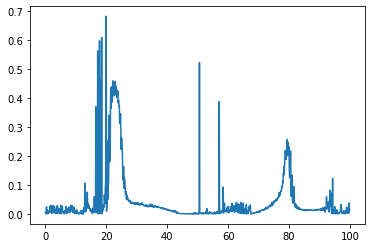

cost =  4.419147928870193
--------------- 17


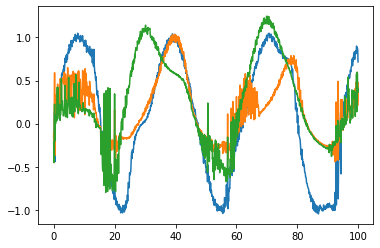

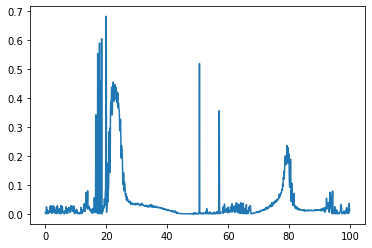

cost =  4.106776785920184
--------------- 18


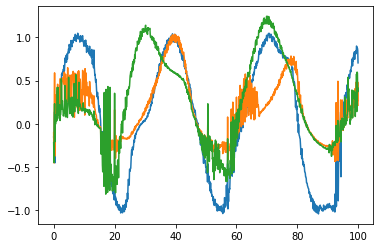

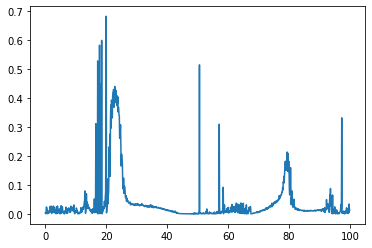

cost =  3.864805653162743
--------------- 19


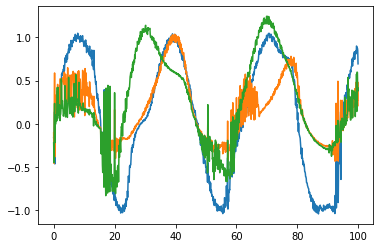

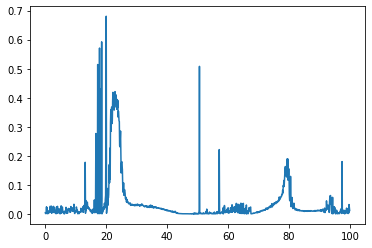

cost =  3.574416512450375
--------------- 20


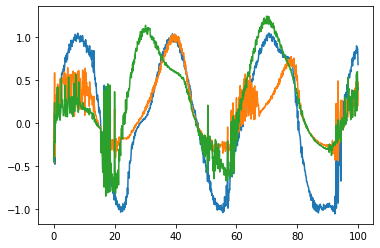

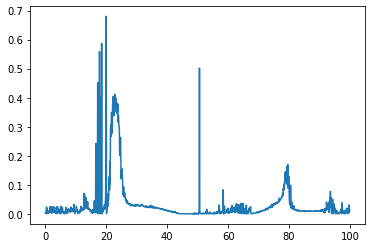

cost =  3.30929879544111
--------------- 21


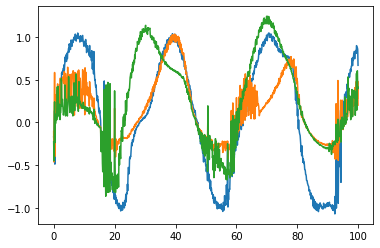

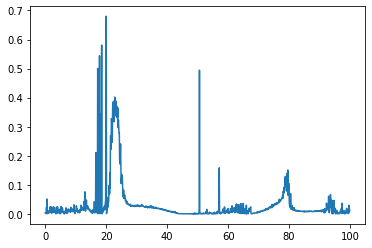

cost =  3.0947315516356353
--------------- 22


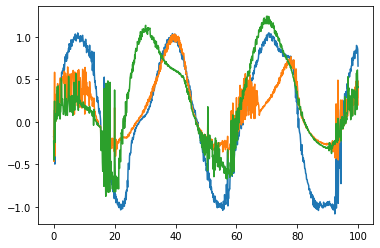

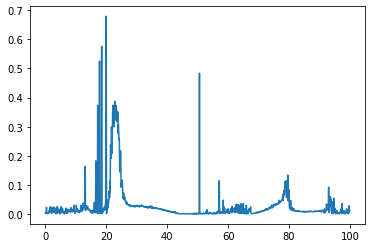

cost =  2.8472597183367054
--------------- 23


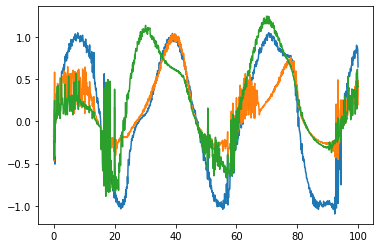

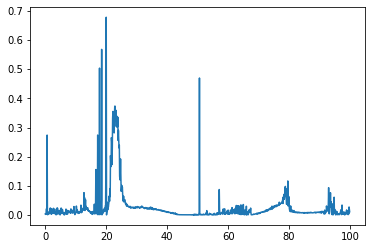

cost =  2.6597409525757456
--------------- 24


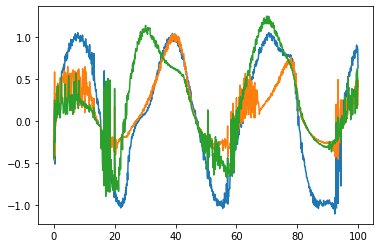

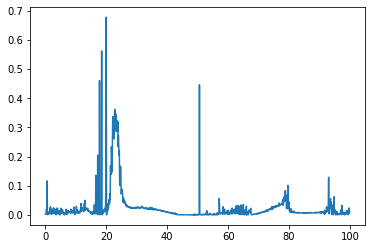

cost =  2.449803863646281
--------------- 25


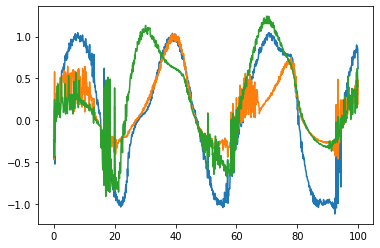

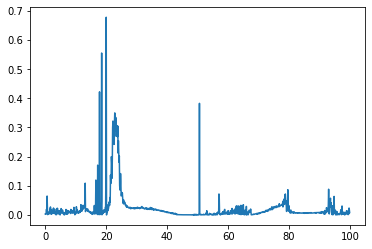

cost =  2.28004976247265
--------------- 26


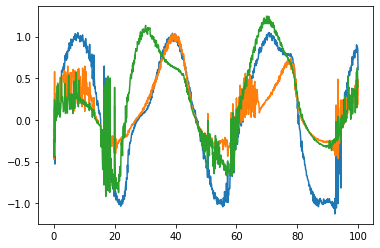

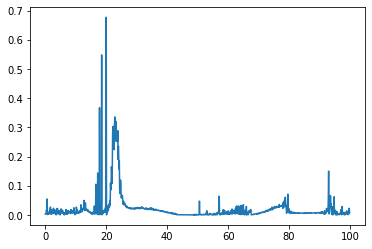

cost =  2.09010403992515
--------------- 27


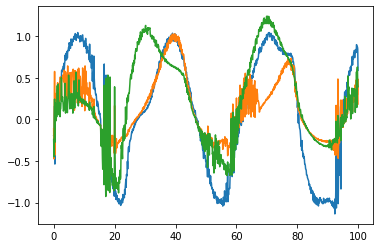

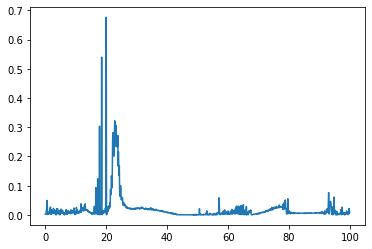

cost =  1.9363018179526876
--------------- 28


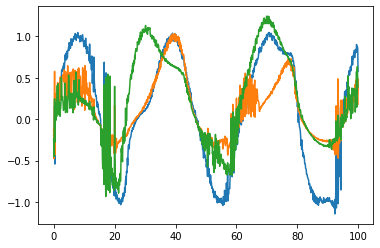

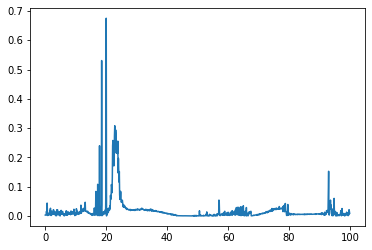

cost =  1.8140956746289265
--------------- 29


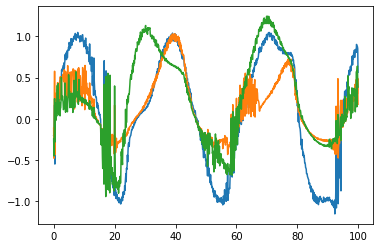

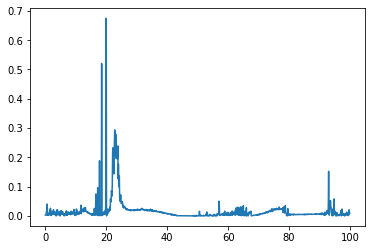

cost =  1.6899795116565484


In [87]:
step = 0.1
ds = 0.1

for k in range(30):
    print("---------------", k)
    for n in range(signal_array.shape[0]):
        plt.plot(time_, signal_array[n,:])
    plt.show()
    
    f_ = f_phase(signal_array)
    plt.plot(time_, f_)
    plt.show()
    
    cost = f_int(f_,dt)
    print("cost = ", cost)
    
    der_signal = derSignal(signal_array, ds)
    signal_array -= step * der_signal
